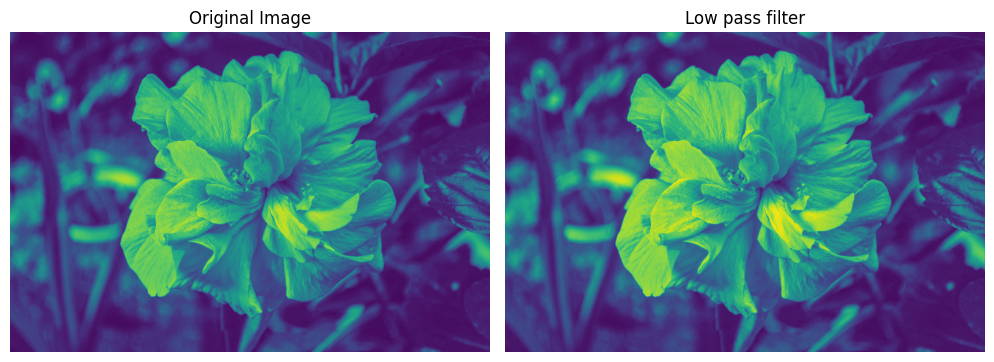

In [5]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def high_pass_filter(image, kernel_size=3):
    img_array = np.array(image)    
    kernel = gaussian_kernel(kernel_size)
    blurred = convolution(img_array, kernel)
    high_pass = img_array - blurred
    high_pass = np.clip(high_pass, 0, 255)
    high_pass_image = Image.fromarray(high_pass.astype(np.uint8))
    return high_pass_image

def low_pass_filter(image, kernel_size=3):
    img_array = np.array(image)    
    kernel = gaussian_kernel(kernel_size)    
    blurred = convolution(img_array, kernel)
    blurred_image = Image.fromarray(blurred.astype(np.uint8))
    return blurred_image

def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2    
    convolved_image = np.zeros_like(image)    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 'constant')    
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            convolved_image[i, j] = np.sum(region * kernel)
    
    return convolved_image

def gaussian_kernel(size, sigma=1):
    center = size // 2    
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-center)**2 + (y-center)**2)/(2*sigma**2)), (size, size))    
    kernel /= np.sum(kernel)
    return kernel

image = Image.open('input_images/img6.jpg').convert('L')

high_pass_result = high_pass_filter(image)

low_pass_result = low_pass_filter(image)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(high_pass_result)
plt.title("Highpass filter")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(low_pass_result)
plt.title("Low pass filter")
plt.axis('off')
plt.tight_layout()

plt.show()
